# project 5
## NLP NEWS Classifier
## machine learnig
### supervised learning (Classification)
### models: linearsvc, complement naive bayes, multinomial naive bayes

In [1]:
#importing nessecarry libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# getting our data
df = pd.read_csv("train.csv")
df.head(10)

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
5,3,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...
6,3,Money Funds Fell in Latest Week (AP),AP - Assets of the nation's retail money marke...
7,3,Fed minutes show dissent over inflation (USATO...,USATODAY.com - Retail sales bounced back a bit...
8,3,Safety Net (Forbes.com),Forbes.com - After earning a PH.D. in Sociolog...
9,3,Wall St. Bears Claw Back Into the Black,"NEW YORK (Reuters) - Short-sellers, Wall Stre..."


In [3]:
#dropping all empty values and irellevant observation
df = df[["Class Index","Description"]].dropna()
df.head(10)

,Class Index,Description
0,3,"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Reuters - Private investment firm Carlyle Grou...
2,3,Reuters - Soaring crude prices plus worries\ab...
3,3,Reuters - Authorities have halted oil export\f...
4,3,"AFP - Tearaway world oil prices, toppling reco..."
5,3,Reuters - Stocks ended slightly higher on Frid...
6,3,AP - Assets of the nation's retail money marke...
7,3,USATODAY.com - Retail sales bounced back a bit...
8,3,Forbes.com - After earning a PH.D. in Sociolog...
9,3,"NEW YORK (Reuters) - Short-sellers, Wall Stre..."


In [4]:
df = df.rename(columns = {"Class Index":"News Type", 'Description': 'News description'})

In [5]:
df[["News Type"]]= df[["News Type"]].replace({3:"Bussiness News", 4:"Science and Technology News", 2:"Sports News", 1: "World News"})
df.head(10)

,News Type,News description
0,Bussiness News,"Reuters - Short-sellers, Wall Street's dwindli..."
1,Bussiness News,Reuters - Private investment firm Carlyle Grou...
2,Bussiness News,Reuters - Soaring crude prices plus worries\ab...
3,Bussiness News,Reuters - Authorities have halted oil export\f...
4,Bussiness News,"AFP - Tearaway world oil prices, toppling reco..."
5,Bussiness News,Reuters - Stocks ended slightly higher on Frid...
6,Bussiness News,AP - Assets of the nation's retail money marke...
7,Bussiness News,USATODAY.com - Retail sales bounced back a bit...
8,Bussiness News,Forbes.com - After earning a PH.D. in Sociolog...
9,Bussiness News,"NEW YORK (Reuters) - Short-sellers, Wall Stre..."


In [6]:
df = df.sample(frac = 1)

In [7]:
#removing all punctuations
def clean_text(text):
    text = text.lower()  # Converting text to lowercase
    text = ''.join(char for char in text if char.isalnum() or char.isspace())  # Remove punctuation
    return text

# Apply cleaning function
df['News description'] = df['News description'].apply(clean_text)
df.head(10)

,News Type,News description
39918,World News,marietta ga about 800 friends and family memb...
40520,Sports News,glen johnson and antonio tarver were joking ab...
80953,Bussiness News,new york president george w bush 39s reelecti...
96959,World News,the united nations has put off for this year t...
60659,Sports News,the nba has no plans to change its rules for t...
52828,World News,pakistani troops patrol the city of multan aft...
10624,World News,moscow reuters investigators examined flight...
73610,Science and Technology News,lexmark suffers a setback in its fight to keep...
41507,Science and Technology News,intel has dropped plans to turn its latest bat...
96755,Science and Technology News,the us air force early next year will require ...


In [8]:
df.head(10)

,News Type,News description
39918,World News,marietta ga about 800 friends and family memb...
40520,Sports News,glen johnson and antonio tarver were joking ab...
80953,Bussiness News,new york president george w bush 39s reelecti...
96959,World News,the united nations has put off for this year t...
60659,Sports News,the nba has no plans to change its rules for t...
52828,World News,pakistani troops patrol the city of multan aft...
10624,World News,moscow reuters investigators examined flight...
73610,Science and Technology News,lexmark suffers a setback in its fight to keep...
41507,Science and Technology News,intel has dropped plans to turn its latest bat...
96755,Science and Technology News,the us air force early next year will require ...


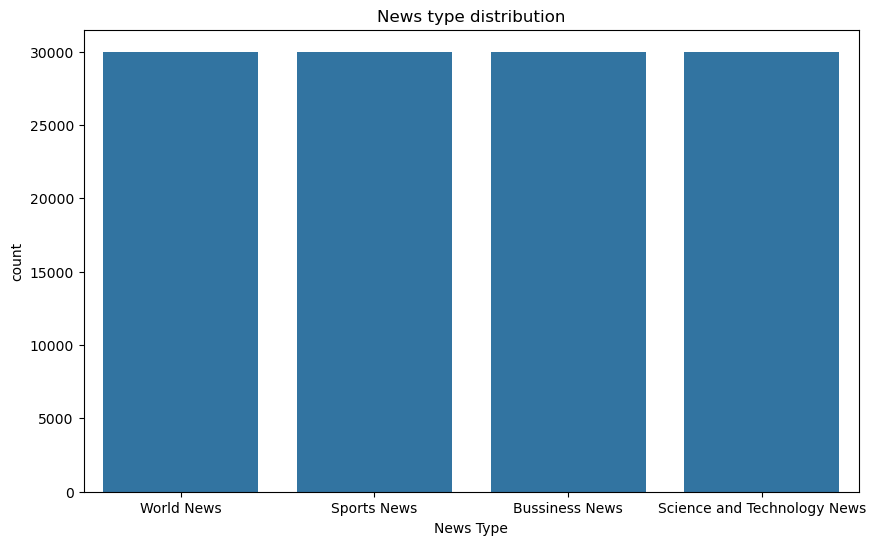

In [9]:
#visualising the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x = "News Type",  data = df)
plt.title("News type distribution")
plt.xlabel("News Type")
plt.ylabel("count")
plt.show()

            


In [10]:
#preparing to split the data
df["News_description"] = df["News description"]
df = df.drop("News description", axis=1)
df.head()

,News Type,News_description
39918,World News,marietta ga about 800 friends and family memb...
40520,Sports News,glen johnson and antonio tarver were joking ab...
80953,Bussiness News,new york president george w bush 39s reelecti...
96959,World News,the united nations has put off for this year t...
60659,Sports News,the nba has no plans to change its rules for t...


In [11]:
x = df["News_description"]
y =df["News Type"]
len(x)

120000

In [12]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 22)

In [13]:
len(x_train)

96000

In [14]:
#importing nessecarry libraries for model creation and architecture
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

In [15]:
#model creation procces
pi_mnb = Pipeline([("tfidf", TfidfVectorizer(stop_words = "english")),("clf", MultinomialNB())])
pi_lsvc = Pipeline([("tfidf", TfidfVectorizer(stop_words = "english")),("clf", LinearSVC())])
pi_cnb = Pipeline([("tfidf", TfidfVectorizer(stop_words = "english")),("clf", ComplementNB())])

In [16]:
#still craeting the model
pi_mnb.fit(x_train, y_train)
predict_mnb = pi_mnb.predict(x_test)
predict_mnb
pi_lsvc.fit(x_train, y_train)
predict_lsvc= pi_lsvc.predict(x_test)
predict_lsvc
pi_cnb.fit(x_train, y_train)
predict_cnb = pi_cnb.predict(x_test)
predict_cnb

array(['World News', 'Bussiness News', 'Science and Technology News', ...,
       'World News', 'Bussiness News', 'Bussiness News'], dtype='<U27')

In [17]:
#creating an access score function for keeping our code dry and clean and also checking which classification method is best
def acc_sc(x, y):
    z = accuracy_score(x, y)*100
    print(round(z),"%")
acc_sc(y_test,predict_mnb)
acc_sc(y_test, predict_lsvc)
acc_sc(y_test, predict_cnb)

90 %
91 %
90 %


In [18]:
#checking classification report
print(classification_report(y_test, predict_lsvc))

                             precision    recall  f1-score   support

             Bussiness News       0.87      0.88      0.88      5989
Science and Technology News       0.88      0.89      0.88      6009
                Sports News       0.96      0.98      0.97      6032
                 World News       0.93      0.89      0.91      5970

                   accuracy                           0.91     24000
                  macro avg       0.91      0.91      0.91     24000
               weighted avg       0.91      0.91      0.91     24000



In [19]:
#still checking
print(classification_report(y_test, predict_cnb))

                             precision    recall  f1-score   support

             Bussiness News       0.87      0.86      0.87      5989
Science and Technology News       0.88      0.86      0.87      6009
                Sports News       0.93      0.98      0.96      6032
                 World News       0.91      0.89      0.90      5970

                   accuracy                           0.90     24000
                  macro avg       0.90      0.90      0.90     24000
               weighted avg       0.90      0.90      0.90     24000



In [20]:
#making predictions
def News_Type_predictor(x):
    z = pi_lsvc.predict([x])
    print("This is a ",z,)

News_Type_predictor("why Banks are migrating to new core Banking system")

This is a  ['Bussiness News']


In [21]:
News_Type_predictor("the 200mp camera phone over samsung galaxy s24 ultra")

This is a  ['Science and Technology News']


In [22]:
News_Type_predictor("space x cathes it first rocket after sevral amount of trail")

This is a  ['Science and Technology News']


In [23]:
import joblib

joblib.dump(pi_lsvc, "text_classifier.pkl")

['text_classifier.pkl']